In [166]:
from Bio.Seq import reverse_complement
from Bio import SeqIO
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import entropy
import seaborn as sns
mpl.rcParams['figure.dpi']= 300

In [167]:
indexes = ['TGGCTTCA',
           'CTAAGGTC',
           'CCGTGAGA',
           'GACTAGTA',
           'AGTGGTCA',
           'AGATCGCA',
           'AGCAGGAA',
           'CATCAAGT',
           'ATCCTGTA',
           'AGCCATGC',
           'GATAGACA']

sample_names = {
            "hybr1_S1":"FFPE_3ng_A_2",
            "hybr1_S2":"FFPE_3ng_A_3",
            "hybr1_S4":"FFPE_3ng_B_2",
            "hybr1_S5":"FFPE_3ng_C_1",
            "hybr4_S9":"FFPE_3ng_A_4",
            "hybr5_S11":"FFPE_3ng_C_2",
            "hybr2_S6":"FFPE_3ng_S",
            "hybr3_S7":"FFPE_100ng_S"}

In [174]:
lst = []
for sample in sample_names.keys():
    data = pd.read_table('../data/umi/{}.umi.txt'.format(sample),
                        index_col=0)
    data['sample'] = [sample_names[sample]]*data.shape[0]
    data['frac'] = data['reads']/sum(data['reads'])
    data = data.reset_index(drop=True)
    lst.append(data)

In [175]:
sum_df = pd.concat(lst)
sum_df = sum_df.sort_values(by='reads')

In [176]:
popular_umi = sum_df.groupby(by='seq').sum().sort_values(by='reads',ascending=False)[:30].index

In [189]:
popular_df = sum_df[sum_df['seq'].isin(list(popular_umi))]

In [190]:
popular_df = popular_df.sort_values(by=['reads','seq'],
                                    ascending=False)

/Users/DanielaNachmanson/conda/lib/python3.6/site-packages/matplotlib/colorbar.py:587: UserWarning: set_ticks() must have been called.
  warnings.warn("set_ticks() must have been called.")


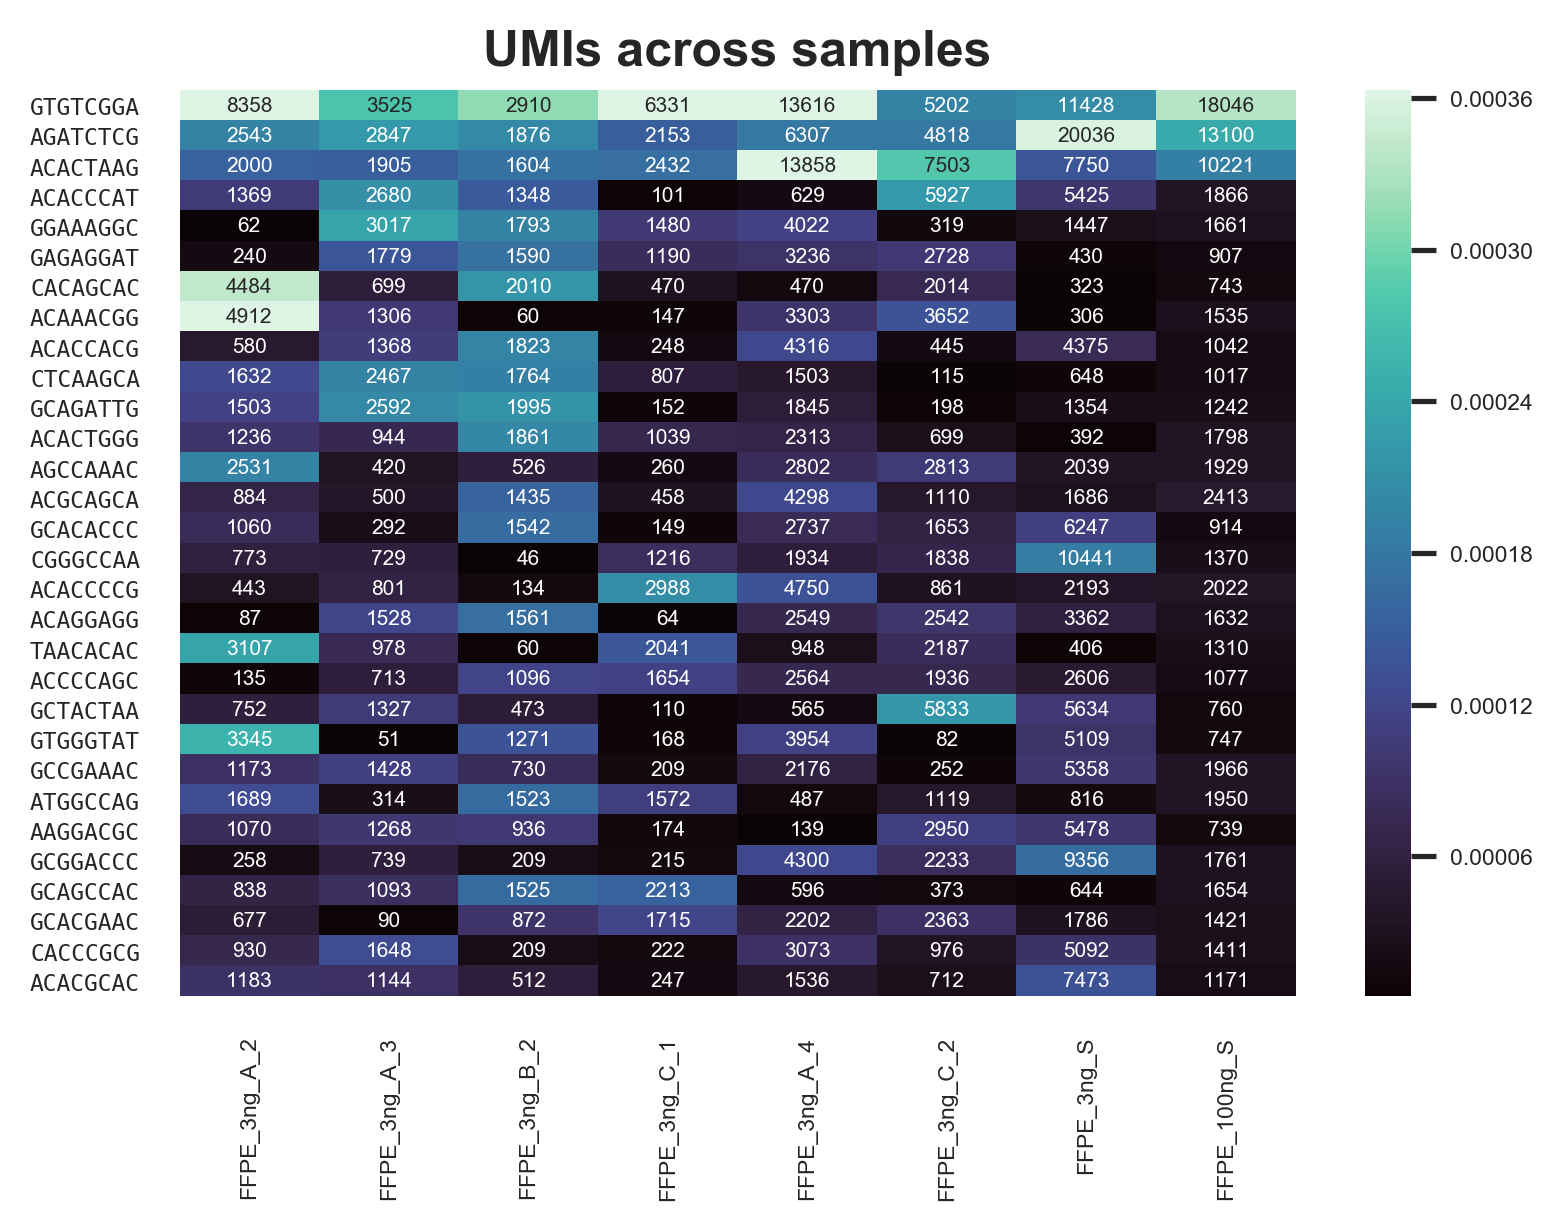

In [276]:
sns.set(font_scale=0.5)
ax = sns.heatmap(frac.loc[pop_umi_seq],
            annot=reads.loc[pop_umi_seq],
            cmap="mako", 
            robust=True,
            annot_kws={"size": 5},
            fmt='g')

hfont = {'fontname':'monospace'}

plt.title('UMIs across samples',fontsize=12,fontweight='bold')
plt.yticks(**hfont)


cbar = ax.collections[0].colorbar
cbar.set_ticklabels(["0%", "0.04%"])